### Imports

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

### Read and re-format

In [92]:
#RELOAD FILE AND PRETEND THAT IS OUR STARTING POINT 
df=pd.read_csv('../../data/00-raw-data/wiki-crawl-results.csv')  
print(df.shape)

#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #y1=[]; y2=[]
y1=[]
for label in df["label"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)

# CONVERT DF TO LIST OF STRINGS 
corpus=df["text"].to_list()
y2=df["sentiment"].to_numpy()

print("number of text chunks = ",len(corpus))
print(corpus[0:3])


(420, 3)
index = 0 : label = Women's rights
index = 1 : label = Men's rights
number of text chunks =  420
['employment right woman include non discriminatory access woman job equal pay right woman men equal pay equal benefit equal work openly denied british hong kong government early 1970s leslie wah leung chung 1917 2009 president hong kong chinese civil servant association 1965 68 contributed establishment equal pay men woman including right married woman permanent employee job status woman changed permanent employee temporary employee married thus losing pension benefit even lost job since nurse mostly woman improvement right married woman meant much nursing profession european country married woman could work without consent husband decade ago example france 1965 spain 1975 addition marriage bar practice adopted late 19th century 1970s across many country including austria australia ireland canada switzerland restricted married woman employment many profession key issue towards ins

### Vectorize the text data

In [93]:
# INITIALIZE COUNT VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
vectorizer=CountVectorizer(min_df=0.001)   

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

#CONVERT TO ONE-HOT VECTORS
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

# DOUBLE CHECK 
print(X.shape,y1.shape,y2.shape)
print("DATA POINT-0:",X[0,0:10],"y1 =",y1[0],"  y2 =",y2[0])

(420, 9960) (420,) (420,)
DATA POINT-0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] y1 = 0   y2 = 0.7983


### Partition Data


In [94]:
# INSERT CODE TO PARTITION DATASET INTO TRAINING-TEST

from sklearn.model_selection import train_test_split
test_ratio=0.2

# SPLIT ARRAYS OR MATRICES INTO RANDOM TRAIN AND TEST SUBSETS.
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape		:",x_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",x_test.shape)
print("y_test.shape		:",y_test.shape)

x_train.shape		: (336, 9960)
y_train.shape		: (336,)
X_test.shape		: (84, 9960)
y_test.shape		: (84,)


### Train model

In [95]:
## helper functions
def report(y,ypred):
      #ACCURACY COMPUTE 
      print("Accuracy:",accuracy_score(y, ypred)*100)
      print("Number of mislabeled points out of a total %d points = %d"
            % (y.shape[0], (y != ypred).sum()))

def print_model_summary():
      # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
      yp_train = model.predict(x_train)
      yp_test = model.predict(x_test)

      print("ACCURACY CALCULATION\n")

      print("TRAINING SET:")
      report(y_train,yp_train)

      print("\nTEST SET (UNTRAINED DATA):")
      report(y_test,yp_test)

      print("\nCHECK FIRST 20 PREDICTIONS")
      print("TRAINING SET:")
      print(y_train[0:20])
      print(yp_train[0:20])
      print("ERRORS:",yp_train[0:20]-y_train[0:20])

      print("\nTEST SET (UNTRAINED DATA):")
      print(y_test[0:20])
      print(yp_test[0:20])
      print("ERRORS:",yp_test[0:20]-y_test[0:20])

In [96]:
from sklearn.naive_bayes import MultinomialNB

# INITIALIZE MODEL 
model = MultinomialNB()

# TRAIN MODEL 
model.fit(x_train,y_train)

# PRINT REPORT USING UTILITY FUNCTION ABOVE
print_model_summary()

ACCURACY CALCULATION

TRAINING SET:
Accuracy: 97.32142857142857
Number of mislabeled points out of a total 336 points = 9

TEST SET (UNTRAINED DATA):
Accuracy: 82.14285714285714
Number of mislabeled points out of a total 84 points = 15

CHECK FIRST 20 PREDICTIONS
TRAINING SET:
[0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
[0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
ERRORS: [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

TEST SET (UNTRAINED DATA):
[0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0]
ERRORS: [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 -1]


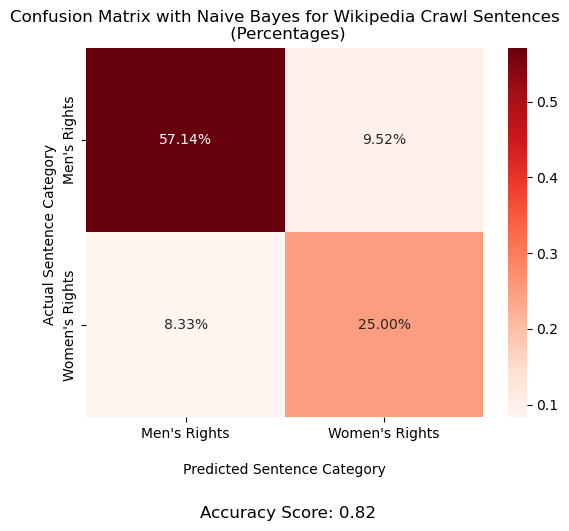

In [97]:
# ref: https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/#:~:text=You%20can%20create%20the%20confusion,False%20Negatives%2C%20and%20True%20negatives.
y_pred = model.predict(x_test)
accuracy_score = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix (percentages)
ax = sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Reds')

ax.set_title('Confusion Matrix with Naive Bayes for Wikipedia Crawl Sentences\n (Percentages)')
ax.set_xlabel('\nPredicted Sentence Category')
ax.set_ylabel('Actual Sentence Category ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Men's Rights", "Women's Rights"])
ax.yaxis.set_ticklabels(["Men's Rights", "Women's Rights"])
txt="Accuracy Score: {:0.2f}".format(accuracy_score)
plt.figtext(0.44, -.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

## Display the visualization of the Confusion Matrix.
plt.show()

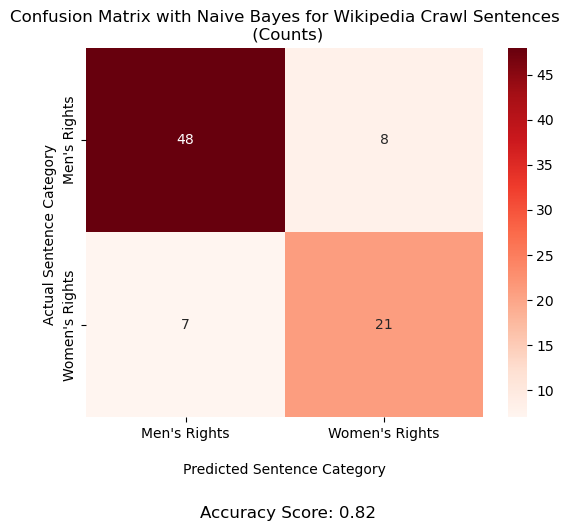

In [98]:
# Confusion Matrix (raw)
ax = sns.heatmap(cm, annot=True, cmap='Reds')

ax.set_title('Confusion Matrix with Naive Bayes for Wikipedia Crawl Sentences\n (Counts)')
ax.set_xlabel('\nPredicted Sentence Category')
ax.set_ylabel('Actual Sentence Category ')
plt.figtext(0.44, -.1, txt, wrap=True, horizontalalignment='center', fontsize=12)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Men's Rights", "Women's Rights"])
ax.yaxis.set_ticklabels(["Men's Rights", "Women's Rights"])

## Display the visual
plt.show()